In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# import ipywidgets
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

# increase cell width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
# goal to find the TVI, pickup, audience, traffic, and engagement charts against both the industry baseline and previous Q average
# attempt to find type link on the 4 major categories and the subcategories (see CSV columns D-P)

In [3]:
# Files to load
# previously known as city_data_to_load
cision_metrics = "Resources/CisionMetricsQ3.csv"

In [4]:
# Read the data file and store it in a pandas DataFrame.
# by creating a df we can reference our file quickly
cision_data_df = pd.read_csv(cision_metrics)
cision_data_df.head(10)

,PR Newswire ID,Release Date,Release Headline,Release Headline Abbreviated,Total Pickup,Exact Matches,Tweets,Total Potential Audience,Total Release Views & Hits,Public Views,...,Previous Q Average,Traffic,Industry Baseline.2,Previous Q Average.1,Audience,Industry Baseline.3,Previous Q Average.2,Engagement,Industry Baseline.4,Previous Q Average.3
0,3463934-1,"Mar 07, 2022 8:30 AM ET",Lumentum to Demonstrate and Preview Innovation...,Demonstrate/Preview Innovations at OFC 22',334,334,0,"193,918,567","3,012","2,546",...,79,36,50,34,4,50,14,96,50,86
1,3462793-1,"Mar 03, 2022 11:18 PM ET",Lumentum Holdings Inc. Announces Pricing of $7...,Pricing of $750 Million Convertible Notes Offe...,341,341,0,"186,182,039","18,147","16,861",...,79,96,50,34,10,50,14,42,50,86
2,3461674-1,"Mar 03, 2022 7:00 AM ET",Lumentum Holdings Inc. Announces $750 Million ...,$750 Million Convertible Notes Offering Announ...,323,323,0,"190,866,462","2,709","2,342",...,79,24,50,34,10,50,14,52,50,86
3,3461666-1,"Mar 03, 2022 7:00 AM ET",Lumentum Increases Share Repurchase Authorizat...,Share Repurchase Authorization to $1 Billion,318,318,0,"194,616,945","3,844","3,076",...,79,34,50,34,46,50,14,86,50,86
4,3460221-1,"Mar 02, 2022 8:30 AM ET",Lumentum Thought Leaders to Present at OFC 2022,Thought Leaders to Present at OFC 2022,329,329,0,"345,425,342","1,864","1,586",...,79,10,50,34,10,50,14,98,50,86
5,3453008-1,"Feb 23, 2022 4:05 PM ET",Lumentum to Host Investor and Analyst Briefing...,Host Investor and Analyst Briefing at OFC 2022,318,318,0,"195,652,184","2,497","1,939",...,79,24,50,34,12,50,14,94,50,86
6,3441165-1,"Feb 14, 2022 8:30 AM ET",Lumentum Announces Upcoming Investor Events,Upcoming Investor Events,329,329,0,"190,785,479","2,159","1,836",...,79,14,50,34,6,50,14,76,50,86
7,3433491-1,"Feb 03, 2022 4:05 PM ET",LUMENTUM RECEIVES THAILAND PRIME MINISTER'S IN...,Lumentum Recieves Thailand PM's Industry Award...,352,352,0,"196,909,144","3,759","3,186",...,79,42,50,34,4,50,14,80,50,86
8,3432997-1,"Feb 03, 2022 7:30 AM ET",LUMENTUM ANNOUNCES FISCAL SECOND QUARTER 2022 ...,Lumentum Fiscal Q2 Financial Results Announcement,334,334,0,200454457,8575,7717,...,79,80,50,34,28,50,14,94,50,86
9,3420060-1,"Jan 21, 2022 8:30 AM ET",Lumentum and NeoPhotonics Announce HSR Clearance,Lumentum/NeoPhotonics Announce HSR Clearance,333,333,0,198237003,5115,4211,...,79,58,50,34,36,50,14,94,50,86


In [5]:
# Get the columns and the rows that are not null.
cision_data_df.count().head()

PR Newswire ID                  12
Release Date                    12
Release Headline                12
Release Headline Abbreviated    12
Total Pickup                    12
dtype: int64

In [6]:
# Get the data types of each column.
cision_data_df.dtypes

PR Newswire ID                  object
Release Date                    object
Release Headline                object
Release Headline Abbreviated    object
Total Pickup                     int64
Exact Matches                    int64
Tweets                           int64
Total Potential Audience        object
Total Release Views & Hits      object
Public Views                    object
Media Views                      int64
Web Crawler Hits                object
Multimedia                       int64
Total Engagement                 int64
Social & Other Shares            int64
Click-throughs                   int64
SocialPost                       int64
Total Visibility                 int64
Industry Baseline                int64
Previous Q Average               int64
Pickup                           int64
Industry Baseline.1              int64
Previous Q Average               int64
Traffic                          int64
Industry Baseline.2              int64
Previous Q Average.1     

In [7]:
# Get the unique values for TVI, Traffic, Pickup, Audience, and Engagement by PR score
cision_data_df["Traffic"].unique()

cision_data_df["Total Visibility"].unique()

cision_data_df["Audience"].unique()

cision_data_df["Engagement"].unique()

cision_data_df["Pickup"].unique()

array([79, 74, 78, 90, 77, 75, 85, 84, 87, 86], dtype=int64)

In [67]:
# make sure to slice or truncate this df to show only the first couple of words in each release

pr_df = cision_data_df["Release Headline Abbreviated"].str.slice(stop=39)
pr_df                     

0     Demonstrate/Preview Innovations at OFC 
1     Pricing of $750 Million Convertible Not
2     $750 Million Convertible Notes Offering
3     Share Repurchase Authorization to $1 Bi
4      Thought Leaders to Present at OFC 2022
5     Host Investor and Analyst Briefing at O
6                    Upcoming Investor Events
7     Lumentum Recieves Thailand PM's Industr
8     Lumentum Fiscal Q2 Financial Results An
9     Lumentum/NeoPhotonics Announce HSR Clea
10    Fiscal Second Quarter 2022 Financial Re
11    Hesai and Lumentum Partner on Next-Gene
Name: Release Headline Abbreviated, dtype: object

In [68]:
# create the 5 dfs as my y axis 

# TVI df
# need the unique values from: 
# Industry Baseline, Previous Q Average, Total Visbility

TVI_df = cision_data_df["Total Visibility"]
TVI_df


0     40
1     62
2     36
3     53
4     37
5     38
6     32
7     44
8     64
9     59
10    52
11    47
Name: Total Visibility, dtype: int64

In [69]:
# Pickup df
# need unique values from: 
# Industry Baseline.1, Previous Q Average, Pickup
Pickup_df = cision_data_df["Pickup"]
Pickup_df

0     79
1     79
2     74
3     78
4     90
5     77
6     75
7     85
8     84
9     84
10    87
11    86
Name: Pickup, dtype: int64

In [70]:
# Traffic df
# need the unique values from: 
# Industry Baseline.2, Previous Q Average.1, Traffic
Traffic_df = cision_data_df["Traffic"]
Traffic_df

0     36
1     96
2     24
3     34
4     10
5     24
6     14
7     42
8     80
9     58
10    62
11    40
Name: Traffic, dtype: int64

In [71]:
# Audience df
# need the unique values from: 
# Industry Baseline.3, Previous Q Average.2, Audience
Audience_df = cision_data_df["Audience"]
Audience_df


0      4
1     10
2     10
3     46
4     10
5     12
6      6
7      4
8     28
9     36
10     8
11    14
Name: Audience, dtype: int64

In [72]:
# Engagement df
# need the unique values from: 
# Industry Baseline.4, Previous Q Average.3, Engagement
Engagement_df = cision_data_df["Engagement"]
Engagement_df

0     96
1     42
2     52
3     86
4     98
5     94
6     76
7     80
8     94
9     94
10    88
11    96
Name: Engagement, dtype: int64

In [73]:
# create the y axis through the IB and previous Q dfs

# get the IB and Prev Q dfs for each press release story (object)
# TVI IB and Prev. Q df 
# use groupby to look at one column in df, and use the press release as our index
# use mean to find previous q average against the press headline


TVI_PreviousQ_df = cision_data_df.groupby(["Release Headline"]).mean()["Previous Q Average"]
TVI_PreviousQ_df.head()
# expected 42 average

Pickup_PreviousQ_df = cision_data_df.groupby(["Release Headline"]).mean()["Previous Q Average"]
Pickup_PreviousQ_df.head()
# expected x average

Traffic_PreviousQ_df = cision_data_df.groupby(["Release Headline"]).mean()["Previous Q Average.1"]
Traffic_PreviousQ_df.head()
# expected 34 average

Audience_PreviousQ_df = cision_data_df.groupby(["Release Headline"]).mean()["Previous Q Average.2"]
Audience_PreviousQ_df.head()
# expected average

Engagement_PreviousQ_df = cision_data_df.groupby(["Release Headline"]).mean()["Previous Q Average.3"]
Engagement_PreviousQ_df.head()




Release Headline
Hesai and Lumentum Partner on Next-Generation LiDAR Solutions                                 86.0
LUMENTUM ANNOUNCES FISCAL SECOND QUARTER 2022 FINANCIAL RESULTS                               86.0
LUMENTUM RECEIVES THAILAND PRIME MINISTER'S INDUSTRY AWARD FOR THE SECOND CONSECUTIVE YEAR    86.0
Lumentum Announces Upcoming Investor Events                                                   86.0
Lumentum Holdings Inc. Announces $750 Million Convertible Notes Offering                      86.0
Name: Previous Q Average.3, dtype: float64

In [74]:
# create a CORRELATED SIZING df: Click-throughs
# overlay a df as a bubble size increase
# Click-through Df overlay
clickT_df = cision_data_df.groupby(["Release Headline"]).mean()["Click-throughs"]
clickT_df

Release Headline
Hesai and Lumentum Partner on Next-Generation LiDAR Solutions                                 517.0
LUMENTUM ANNOUNCES FISCAL SECOND QUARTER 2022 FINANCIAL RESULTS                               427.0
LUMENTUM RECEIVES THAILAND PRIME MINISTER'S INDUSTRY AWARD FOR THE SECOND CONSECUTIVE YEAR     83.0
Lumentum Announces Upcoming Investor Events                                                    46.0
Lumentum Holdings Inc. Announces $750 Million Convertible Notes Offering                        0.0
Lumentum Holdings Inc. Announces Pricing of $750 Million Convertible Notes Offering             0.0
Lumentum Increases Share Repurchase Authorization to $1 Billion                                28.0
Lumentum Thought Leaders to Present at OFC 2022                                               906.0
Lumentum and NeoPhotonics Announce HSR Clearance                                              396.0
Lumentum to Announce Fiscal Second Quarter 2022 Financial Results on February 3, 20

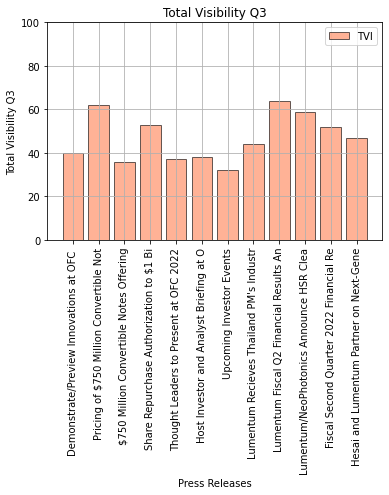

In [75]:
# x = strings
#x_axis = ["Heasi Lidar", "Q2 Fiscal Results", "Thailand Prime Minister", "Upcoming Investor Events", "750M Notes", "Share Repurchase", 
          #"Thoughts Leaders OFC", "NeoPhotonics HSR", "Q2 Fiscal Feb.", "Innovations OFC", "Analyst Briefing OFC"]
#y_axis = [40, 62, 36, 53, 37, 38, 32, 44, 64, 59, 52, 47]

#x_axis = ["Release 1","Release 2","Release 3","Release 4","Release 5","Release 6","Release 7","Release 8", "Release 9", "Release 10", "Release 11"]

# create x axis as release headline dictionary 
#x_axis = {"Heasi Lidar":1, "Q2 Fiscal Results":2, "Thailand Prime Minister":3, "Upcoming Investor Events":4,
          #"750M Notes":5, "Share Repurchase":6, "Thoughts Leaders OFC":7, 
          #"NeoPhotonics HSR":8, "Q2 Fiscal Feb.":9, "Innovations OFC":10, "Analyst Briefing OFC":11}

# find vertical syntax for prdf for x axis titles
x_axis = pr_df
y_axis = TVI_df

plt.bar(x_axis,y_axis, color = "coral", label = "TVI", edgecolor = "black", linewidth = 1, alpha =0.6)
plt.title("Total Visibility Q3")
plt.xlabel("Press Releases")
plt.ylabel("Total Visibility Q3")
plt.ylim(0,100)
plt.grid()
plt.legend()

plt.xticks(rotation = 90)

# interact argument here


# Save the figure.
plt.savefig("Resources/barTVI.png")

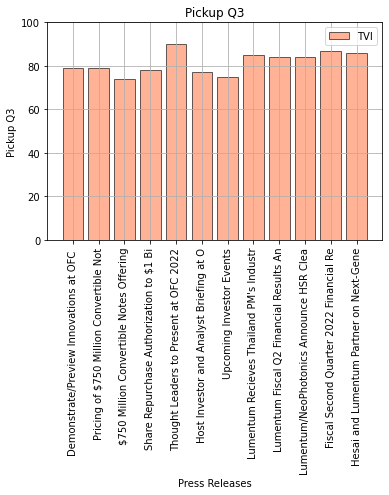

In [76]:
# pickup vs previous q bar
x_axis = pr_df
y_axis = Pickup_df

plt.bar(x_axis,y_axis, color = "coral", label = "TVI", edgecolor = "black", linewidth = 1, alpha =0.6)
plt.title("Pickup Q3")
plt.xlabel("Press Releases")
plt.ylabel("Pickup Q3")
plt.ylim(0,100)
plt.grid()
plt.legend()
plt.xticks(rotation = 90)
# Save the figure.
plt.savefig("Resources/barPickup.png")

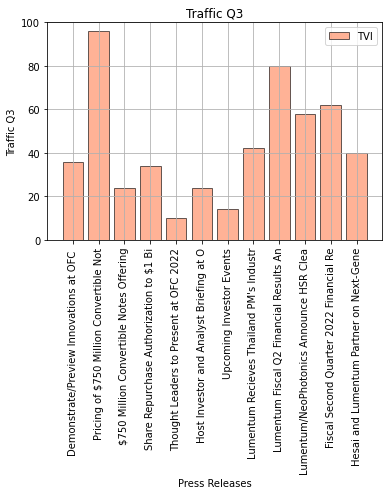

In [77]:
# traffic vs previous q bar
x_axis = pr_df
y_axis = Traffic_df

plt.bar(x_axis,y_axis, color = "coral", label = "TVI", edgecolor = "black", linewidth = 1, alpha =0.6)
plt.title("Traffic Q3")
plt.xlabel("Press Releases")
plt.ylabel("Traffic Q3")
plt.ylim(0,100)
plt.grid()
plt.legend()
plt.xticks(rotation = 90)
# Save the figure.
plt.savefig("Resources/barTraffic.png")

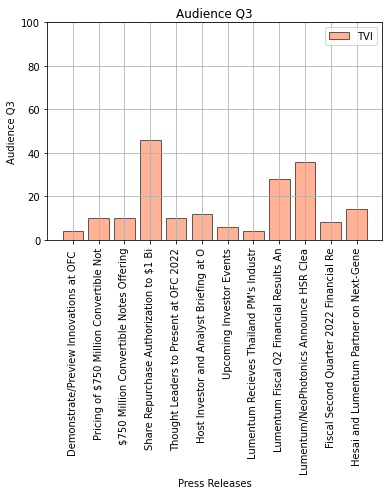

In [78]:
# audience vs previous q bar
x_axis = pr_df
y_axis = Audience_df

plt.bar(x_axis,y_axis, color = "coral", label = "TVI", edgecolor = "black", linewidth = 1, alpha =0.6)
plt.title("Audience Q3")
plt.xlabel("Press Releases")
plt.ylabel("Audience Q3")
plt.ylim(0,100)
plt.grid()
plt.legend()
plt.xticks(rotation = 90)
# Save the figure.
plt.savefig("Resources/barAudience.png")

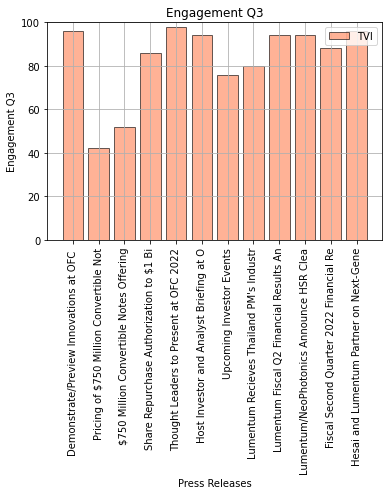

In [79]:
# engagement vs previous q bar
x_axis = pr_df
y_axis = Engagement_df

plt.bar(x_axis,y_axis, color = "coral", label = "TVI", edgecolor = "black", linewidth = 1, alpha =0.6)
plt.title("Engagement Q3")
plt.xlabel("Press Releases")
plt.ylabel("Engagement Q3")
plt.ylim(0,100)
plt.grid()
plt.legend()
plt.xticks(rotation = 90)
# Save the figure.
plt.savefig("Resources/barEngagements.png")

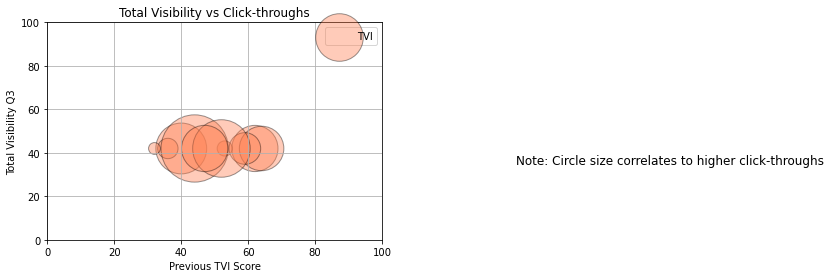

In [86]:
# charts to create: 

# x axis TVI_PreviousQ_df, TVI_df y axis and clickT_df overlay

plt.scatter(TVI_df, TVI_PreviousQ_df, s = 5*clickT_df, c = "coral", label = "TVI", edgecolor = "black", linewidth = 1, alpha =0.4)
plt.title("Total Visibility vs Click-throughs")
plt.xlabel("Previous TVI Score")
plt.ylabel("Total Visibility Q3")
plt.xlim(0,100)
plt.ylim(0,100)
plt.grid()
plt.legend()
plt.text(140, 35, "Note: Circle size correlates to higher click-throughs", fontsize="12")
plt.show

# Save the figure.
plt.savefig("Resources/HeatMapTVI.png")

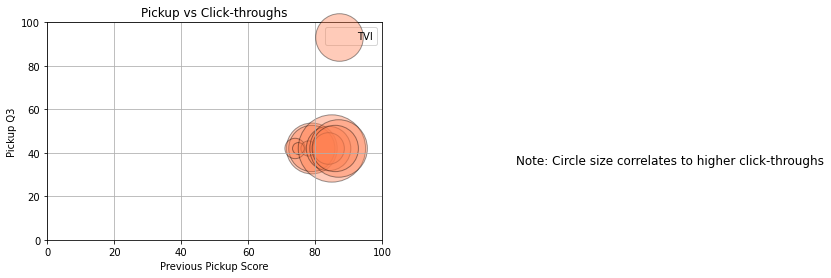

In [87]:
# x axis Pickup_PreviousQ_df, Pikcup_df y axis and clickT overlay
plt.scatter(Pickup_df, TVI_PreviousQ_df, s = 5*clickT_df, c = "coral", label = "TVI", edgecolor = "black", linewidth = 1, alpha =0.4)
plt.title("Pickup vs Click-throughs")
plt.xlabel("Previous Pickup Score")
plt.ylabel("Pickup Q3")
plt.xlim(0,100)
plt.ylim(0,100)
plt.grid()
plt.legend()
plt.text(140, 35, "Note: Circle size correlates to higher click-throughs", fontsize="12")
plt.show

# Save the figure.
plt.savefig("Resources/HeatMapPickups.png")

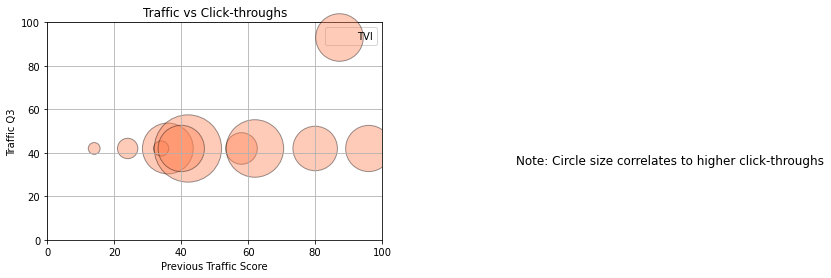

In [88]:
# x axis Traffic_PreviousQ_df, Traffic_df y axis and clickT overlay
plt.scatter(Traffic_df, TVI_PreviousQ_df, s = 5*clickT_df, c = "coral", label = "TVI", edgecolor = "black", linewidth = 1, alpha =0.4)
plt.title("Traffic vs Click-throughs")
plt.xlabel("Previous Traffic Score")
plt.ylabel("Traffic Q3")
plt.xlim(0,100)
plt.ylim(0,100)
plt.grid()
plt.legend()
plt.text(140, 35, "Note: Circle size correlates to higher click-throughs", fontsize="12")
plt.show

# Save the figure.
plt.savefig("Resources/HeatMapTraffic.png")

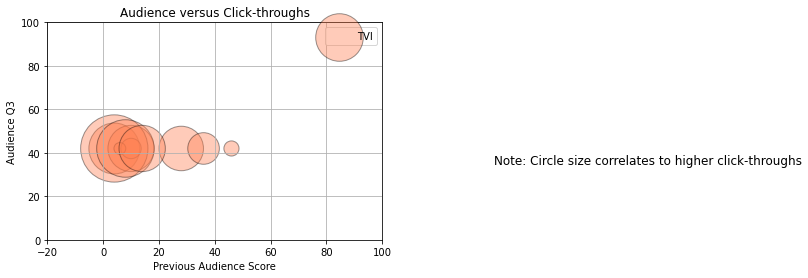

In [89]:
# x axis Audience_PreviousQ_df, Audience_df y axis and clickT overlay
plt.scatter(Audience_df, TVI_PreviousQ_df, s = 5*clickT_df, c = "coral", label = "TVI", edgecolor = "black", linewidth = 1, alpha =0.4)
plt.title("Audience versus Click-throughs")
plt.xlabel("Previous Audience Score")
plt.ylabel("Audience Q3")
plt.xlim(-20,100)
plt.ylim(0,100)
plt.grid()
plt.legend()
plt.text(140, 35, "Note: Circle size correlates to higher click-throughs", fontsize="12")
plt.show

# Save the figure.
plt.savefig("Resources/HeatMapAudience.png")

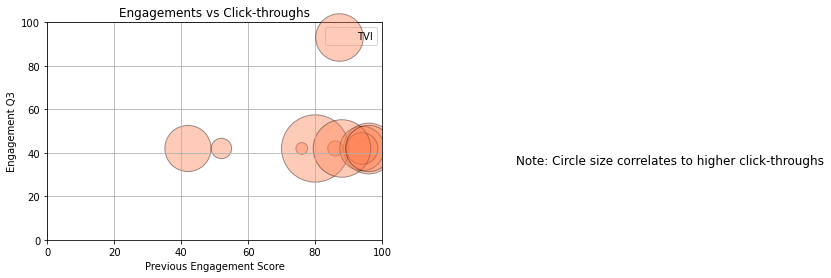

In [90]:
# x axis Engagement_PreviousQ_df, Engagement_df y axis and clickT overlay

plt.scatter(Engagement_df, TVI_PreviousQ_df, s = 5*clickT_df, c = "coral", label = "TVI", edgecolor = "black", linewidth = 1, alpha =0.4)
plt.title("Engagements vs Click-throughs")
plt.xlabel("Previous Engagement Score")
plt.ylabel("Engagement Q3")
plt.xlim(0,100)
plt.ylim(0,100)
plt.grid()
plt.legend()
# add note to right, tells user that circle size correlates to driver count per city
plt.text(140, 35, "Note: Circle size correlates to higher click-throughs", fontsize="12")
plt.show

# Save the figure.
plt.savefig("Resources/HeatMapEngagements.png")

In [85]:
# end of analysis